$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [72]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/1.19/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
import matplotlib.pyplot as plt
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [73]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2


In [74]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [75]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code to compute step length
  g = gradf
  g_t = np.matrix.transpose(g)
  step_length = np.matmul(g_t, g)/(2*np.matmul(np.matmul(g_t, A), g))
  
  return step_length

In [76]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  p = - gradf
  #implement the backtracking line search
  #print(evalf(x + alpha*p), evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(p), p) ))
  while evalf(x + alpha*p) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(-p), p) ):
    alpha = alpha * rho
  #print('final step length:',alpha)
  return alpha

In [77]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [78]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, k


In [79]:

my_start_x = np.array([5,5])
my_tol= 1e-5


x_opt, k = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print("Minimizer: {}, Minimum function value: {}".format(x_opt, evalf(x_opt)))

print("\nUsing Exact Line Search")
x_opt, k = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer: {}, Minimum function value: {}".format(x_opt, evalf(x_opt)))

#check what happens when you call find_minimzer using backtracking line search
print("\nUsing Backtracking Line Search")
x_opt_bls, k = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print("Minimizer: {}, Minimum function value: {}".format(x_opt_bls, evalf(x_opt_bls)))


Minimizer: [  7.99999923 -11.99999563], Minimum function value: 1.9699467881915195e-11

Using Exact Line Search
Minimizer: [  8. -12.], Minimum function value: 0.0

Using Backtracking Line Search
Minimizer: [  8. -12.], Minimum function value: 0.0


$\textbf{Question 3}: $
$f(\textbf{x}) = f(x_1, x_2) = (x_1 - 8)^2 + (x_2 + 12)^2 $

We found the minimizer and the munimum function value of $f(\mathbf{x})$ are as follows:
*   Minimizer: $(8, -12)$
*   Minimum function value: $0$

$\textbf{Question 4}: $
$f(\textbf{x}) = f(x_1, x_2) = (x_1 - 8)^2 + (x_2 + 12)^2 $

We choose $\tau = 10^{-12}$ and strating point $\mathbf{x}^0 = (25, 25)$. We use gradient descent procedure which uses exact step length computation against the gradient descent procedure which uses the backtracking line search procedure (with $\alpha^0 = 1,  \rho = 0.5, 
 \gamma = 0.5$).

In [80]:
my_start_x = np.array([25, 25])
my_tol= 1e-12

#exact line search
x_opt, iterations_using_exact_line_search = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Using exact Line Search: \nMinimizer: {}, Minimum function value: {}, No. of Iterations: {}\n".format(x_opt, evalf(x_opt), iterations_using_exact_line_search))

#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, iterations_using_backtracking_line_search = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print("Using Backtracking algorithm:\nMinimizer: {}, Minimum function value: {}, No. of Iterations: {}\n".format(x_opt_bls, evalf(x_opt_bls), iterations_using_backtracking_line_search))


Using exact Line Search: 
Minimizer: [  8. -12.], Minimum function value: 0.0, No. of Iterations: 1

Using Backtracking algorithm:
Minimizer: [  8. -12.], Minimum function value: 0.0, No. of Iterations: 1



Here we observed that gradient descent procedure which uses exact step length computation is just taking one iteration to converge and find the minimizer while the gradient descent procedure which uses the backtracking line search procedure (with $\alpha^0 = 1,  \rho = 0.5, 
 \gamma = 0.5$) is also taking 1 iteration to converge and find the minimizer.

 Gradient descent procedure which uses exact step length computation is fast because it is optimizing the function in the direction of the negative of the gradient while the gradient descent procedure which uses the backtracking line search procedure is trying to find the minimum value of function in the neighbourhood of the current point in the each iteration. Here both are are converging within one step.

$\textbf{Question 5}: $
$f(\textbf{x}) = f(x_1, x_2) = (x_1 - 8)^2 + (x_2 + 12)^2 $

We choose $\tau = 10^{-10}$. We study the behavior of the backtracking line search algorithm for dierent choices of $\alpha^0$. We choose $\rho = 0.5,  \gamma = 0.5$ and $\alpha^0 \in \{1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01\}$

In [81]:
alpha_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
my_start_x = np.array([25, 25])
my_tol= 1e-10
iteration_counter = []
for alpha in alpha_values:
  #print(alpha)
  x_opt_bls, iterations_using_backtracking_line_search = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, 0.5,0.5)
  iteration_counter.append(iterations_using_backtracking_line_search)
  print("alpha:", alpha, "\nMinimizer: {}, Minimum function value: {}, No. of Iterations: {}\n".format(x_opt_bls, evalf(x_opt_bls), iterations_using_backtracking_line_search))
  #print(alpha,"  |(", x_opt_bls[0],",", x_opt_bls[1] , ")|", evalf(x_opt_bls), "|", iterations_using_backtracking_line_search)

alpha: 1 
Minimizer: [  8. -12.], Minimum function value: 0.0, No. of Iterations: 1

alpha: 0.9 
Minimizer: [  8. -12.], Minimum function value: 1.6579714975258972e-21, No. of Iterations: 12

alpha: 0.75 
Minimizer: [  8. -12.], Minimum function value: 1.3714654556129199e-21, No. of Iterations: 20

alpha: 0.6 
Minimizer: [  8. -12.], Minimum function value: 2.2038291998576117e-21, No. of Iterations: 30

alpha: 0.5 
Minimizer: [  8. -12.], Minimum function value: 0.0, No. of Iterations: 1

alpha: 0.4 
Minimizer: [  8. -12.], Minimum function value: 1.1393259623274523e-22, No. of Iterations: 18

alpha: 0.25 
Minimizer: [  8. -12.], Minimum function value: 1.3714654556129199e-21, No. of Iterations: 40

alpha: 0.1 
Minimizer: [  8. -12.], Minimum function value: 2.3972320602008796e-21, No. of Iterations: 123

alpha: 0.01 
Minimizer: [  8. -12.], Minimum function value: 2.4523367712209537e-21, No. of Iterations: 1358



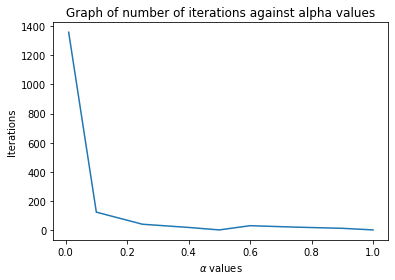

In [82]:
plt.plot(alpha_values, iteration_counter)
plt.title("Graph of number of iterations against alpha values")
plt.xlabel(r'$\alpha$ values')
plt.ylabel('Iterations')
plt.show()

Here in the graph we see that when $\alpha^0$ is very close to zero then algorithm is taking so many iterations to converge and when $\alpha^0$ is approching towards $0.5$, number of iterations are becoming less. Similarly when $\alpha^0$ is decreasing from $0.9$ to $0.5$, number of iterations to converge the algorithm is increasing and at $0.5$, it is again $1$. When $\alpha^0 \in \{0.5, 0\}$, only $1$ iteration is required.

For $\alpha^0 \in \{0.5, 0\}$, gradient descent with backtracking line search takes same number of iterations when compared to the gradient descent procedure with exact line search.

$\textbf{Question 6}: $
$f(\textbf{x}) = f(x_1, x_2) = (x_1 - 8)^2 + (x_2 + 12)^2 $

In [83]:
rho_values = [0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
my_start_x = np.array([25, 25])
my_tol= 1e-10
iteration_counter = []
for rho in rho_values:
  x_opt_bls, iterations_using_backtracking_line_search = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, rho, 0.5)
  iteration_counter.append(iterations_using_backtracking_line_search)
  print("rho:", rho, "\nMinimizer: {}, Minimum function value: {}, No. of Iterations: {}\n".format(x_opt_bls, evalf(x_opt_bls), iterations_using_backtracking_line_search))
  #print(rho,"  |(", x_opt_bls[0],",", x_opt_bls[1] , ")|", evalf(x_opt_bls), "|", iterations_using_backtracking_line_search)

rho: 0.9 
Minimizer: [  8. -12.], Minimum function value: 4.960536411900771e-22, No. of Iterations: 9

rho: 0.75 
Minimizer: [  8. -12.], Minimum function value: 1.0819468296335504e-21, No. of Iterations: 15

rho: 0.6 
Minimizer: [  8. -12.], Minimum function value: 7.844395544174143e-22, No. of Iterations: 22

rho: 0.5 
Minimizer: [  8. -12.], Minimum function value: 0.0, No. of Iterations: 1

rho: 0.4 
Minimizer: [  8. -12.], Minimum function value: 1.1393259623274523e-22, No. of Iterations: 18

rho: 0.25 
Minimizer: [  8. -12.], Minimum function value: 1.3714654556129199e-21, No. of Iterations: 40

rho: 0.1 
Minimizer: [  8. -12.], Minimum function value: 2.3972320602008796e-21, No. of Iterations: 123

rho: 0.01 
Minimizer: [  8. -12.], Minimum function value: 2.4523367712209537e-21, No. of Iterations: 1358



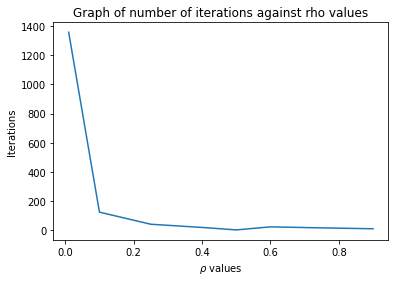

In [84]:
plt.plot(rho_values, iteration_counter)
plt.title("Graph of number of iterations against rho values")
plt.xlabel(r'$\rho$ values')
plt.ylabel('Iterations')
plt.show()

Here we observe that when $\rho$ value is dcreasing upto $0.5$ from $0.9$, final minimizer is diverging from $(8, -12)$ very slightly and so objective function value is diverging from $0$ very slightly. Similarly, when $\rho$ value is increasing upto $0.5$ from $0$, final minimizer is also converging to $(8, -12)$ and so objective function value is converging to $0$ accordingly. When $\rho = 0.5$, the final minimizer is $(8, -15)$ and optimal objective value is $0$.

Here in the graph we see that when $\rho$ is very close to zero then algorithm is taking so many iterations to converge and when $\rho$ is approching towards $0.5$ from $0$, number of iterations are becoming less. Similarly when $rho$ is decreasing from $0.9$ to $0.5$, number of iterations to converge the algorithm is increasing and at $0.5$, it is again only $1$ iteration. When $\rho = 0.5$, only $1$ iteration is required.

For $\rho = 0.5$, gradient descent with backtracking line search takes same number of iterations when compared to the gradient descent procedure with exact line search.
